In [3]:
import matplotlib.pyplot as plt #Imports the pyplot module from matplotlib, commonly used for creating static plots like line graphs, bar charts, histograms, etc. 'plt' is the alias used to reference it.
import numpy as np  # Imports NumPy, a powerful library for numerical computing in Python. 'np' is the alias used. It's often used for arrays, math operations, linear algebra, and more.
import pandas as pd  # Imports pandas, a library for data manipulation and analysis. 'pd' is the common alias and is mainly used for working with DataFrames and Series.
import scipy as sp  # Imports SciPy, a library that builds on NumPy for advanced scientific and technical computing like optimization, integration, interpolation, and more. 'sp' is the alias used.
import seaborn as sns  # Imports Seaborn, a data visualization library built on top of matplotlib. 'sns' is the alias used and it's great for making statistical graphics with better aesthetics.


In [7]:
#The dataset: wages

from sklearn.datasets import fetch_openml  # This imports the function 'fetch_openml' from scikit-learn's datasets module. 
                                           # 'fetch_openml' is used to download datasets from the OpenML repository (an online collection of machine learning datasets).
survey = fetch_openml(data_id=534, as_frame=True)  # This line fetches the dataset with ID 534 from OpenML and stores it in the variable 'survey'.
                                                   # 'data_id=534' specifies which dataset to load (in this case, it's the "Student Alcohol Consumption" dataset).
                                                   # 'as_frame=True' returns the data as a pandas DataFrame instead of NumPy arrays.
X = survey.data[survey.feature_names]  ## Selects all the feature columns from the dataset using the feature names and stores them in variable X
X.describe(include="all")  ## Displays descriptive statistics for all columns in X, including both numeric and categorical features
                           # For numeric: shows count, mean, std, min, max, etc.
                           # For categorical: shows count, unique values, top (most frequent), and frequency of the top value

#data: the features (X values) in a DataFrame, This contains the features (also called independent variables or input variables) of the dataset.

#target: the labels or target variable (if defined), This is the target variable (also called dependent variable or output).

#feature_names, DESCR, and other metadata.- This is a list of the names of the columns (features) in the data.

EDUCATION SOUTH   SEX  EXPERIENCE       UNION         AGE   RACE  \
count   534.000000   534   534  534.000000         534  534.000000    534   
unique         NaN     2     2         NaN           2         NaN      3   
top            NaN    no  male         NaN  not_member         NaN  White   
freq           NaN   378   289         NaN         438         NaN    440   
mean     13.018727   NaN   NaN   17.822097         NaN   36.833333    NaN   
std       2.615373   NaN   NaN   12.379710         NaN   11.726573    NaN   
min       2.000000   NaN   NaN    0.000000         NaN   18.000000    NaN   
25%      12.000000   NaN   NaN    8.000000         NaN   28.000000    NaN   
50%      12.000000   NaN   NaN   15.000000         NaN   35.000000    NaN   
75%      15.000000   NaN   NaN   26.000000         NaN   44.000000    NaN   
max      18.000000   NaN   NaN   55.000000         NaN   64.000000    NaN   

       OCCUPATION SECTOR     MARR  
count         534    534      534  
unique          6      3        2  
top         Other  Other  Married  
freq          156    411      350  
mean          NaN    NaN      NaN  
std           NaN    NaN      NaN  
min           NaN    NaN      NaN  
25%           NaN    NaN      NaN  
50%           NaN    NaN      NaN  
75%           NaN    NaN      NaN  
max           NaN    NaN      NaN

In [9]:
X = survey.data[survey.feature_names]  # Select only the feature columns from the dataset and store them in variable X
X.describe(include="all")  # Show summary statistics for all columns, including both numeric and categorical data


EDUCATION SOUTH   SEX  EXPERIENCE       UNION         AGE   RACE  \
count   534.000000   534   534  534.000000         534  534.000000    534   
unique         NaN     2     2         NaN           2         NaN      3   
top            NaN    no  male         NaN  not_member         NaN  White   
freq           NaN   378   289         NaN         438         NaN    440   
mean     13.018727   NaN   NaN   17.822097         NaN   36.833333    NaN   
std       2.615373   NaN   NaN   12.379710         NaN   11.726573    NaN   
min       2.000000   NaN   NaN    0.000000         NaN   18.000000    NaN   
25%      12.000000   NaN   NaN    8.000000         NaN   28.000000    NaN   
50%      12.000000   NaN   NaN   15.000000         NaN   35.000000    NaN   
75%      15.000000   NaN   NaN   26.000000         NaN   44.000000    NaN   
max      18.000000   NaN   NaN   55.000000         NaN   64.000000    NaN   

       OCCUPATION SECTOR     MARR  
count         534    534      534  
unique          6      3        2  
top         Other  Other  Married  
freq          156    411      350  
mean          NaN    NaN      NaN  
std           NaN    NaN      NaN  
min           NaN    NaN      NaN  
25%           NaN    NaN      NaN  
50%           NaN    NaN      NaN  
75%           NaN    NaN      NaN  
max           NaN    NaN      NaN

In [11]:
#Note that the dataset contains categorical and numerical variables.
#We will need to take this into account when preprocessing the dataset thereafter.

X.head()  # Displays the first 5 rows of the DataFrame X to quickly inspect the data


EDUCATION SOUTH     SEX  EXPERIENCE       UNION  AGE      RACE OCCUPATION  \
0          8    no  female          21  not_member   35  Hispanic      Other   
1          9    no  female          42  not_member   57     White      Other   
2         12    no    male           1  not_member   19     White      Other   
3         12    no    male           4  not_member   22     White      Other   
4         12    no    male          17  not_member   35     White      Other   

          SECTOR       MARR  
0  Manufacturing    Married  
1  Manufacturing    Married  
2  Manufacturing  Unmarried  
3          Other  Unmarried  
4          Other    Married

In [13]:
#Our target for prediction: the wage. Wages are described as floating-point number in dollars per hour.

y = survey.target.values.ravel()  # Extracts the target column values as a NumPy array and flattens it into a 1D array for modeling
survey.target.head()  # Displays the first 5 values from the target column to check what the labels look like


0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [15]:
#We split the sample into a train and a test dataset. Only the train dataset will be used in the following exploratory analysis.
#This is a way to emulate a real situation where predictions are performed on an unknown target, and we don’t want our analysis and decisions to be biased by our knowledge of the test data.
from sklearn.model_selection import train_test_split  # Imports the function to split data into training and testing sets from scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Splits the features (X) and target (y) into training and test sets
                                                                            # random_state=42 ensures reproducibility of the split every time you run the code


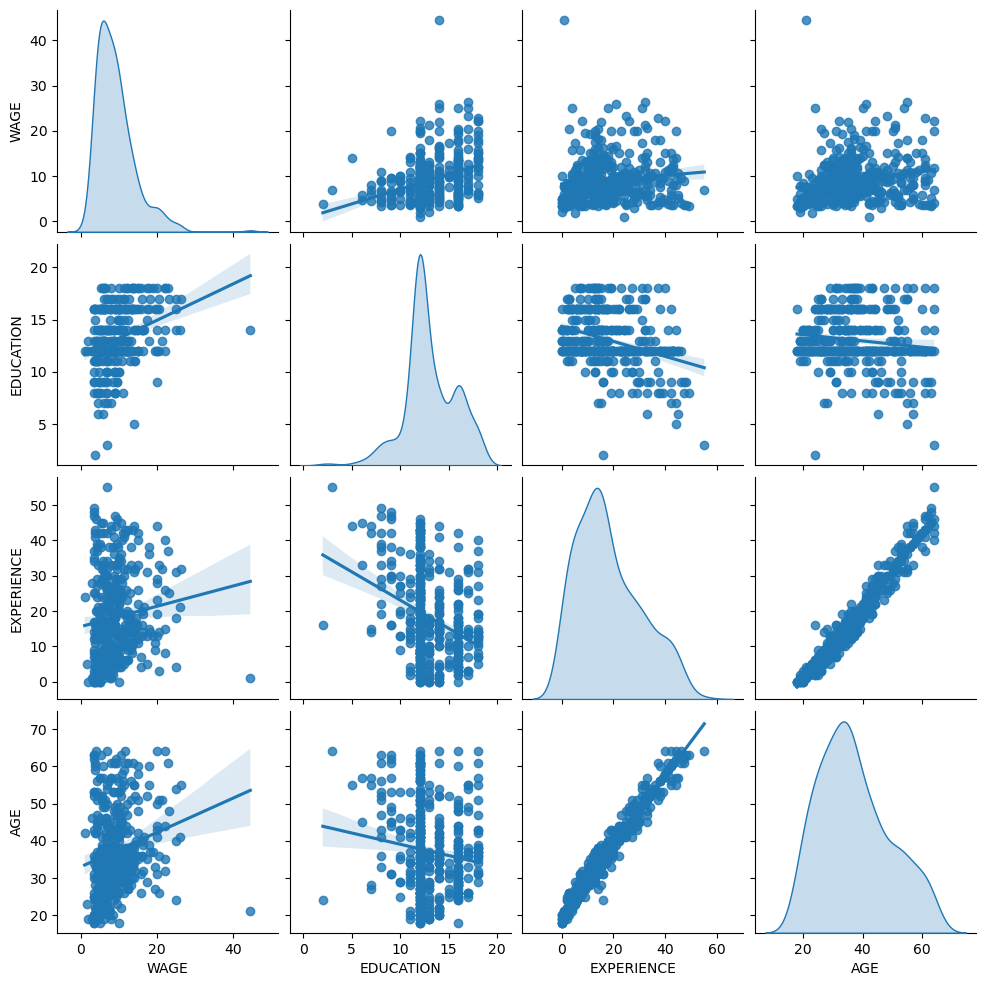

In [17]:
#First, let’s get some insights by looking at the variable distributions and at the pairwise relationships between them. 
#Only numerical variables will be used. In the following plot, each dot represents a sample.

train_dataset = X_train.copy()  # Creates a copy of the training feature data (X_train) to avoid modifying the original data
train_dataset.insert(0, "WAGE", y_train)  # Inserts the target variable 'y_train' as a new column named "WAGE" at position 0 (first column) in the DataFrame
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")  # Creates a seaborn pairplot to visualize pairwise relationships between variables
                                                              # kind="reg" adds linear regression lines to the scatter plots
                                                              # diag_kind="kde" adds kernel density estimates on the diagonal instead of histograms
                                                              # _ is used to suppress the plot object output (we only care about the visual)

#Looking closely at the WAGE distribution reveals that it has a long tail. For this reason, we should take its logarithm to turn it approximately into a normal distribution (linear models such as ridge or lasso work best for a normal distribution of error).
#The WAGE is increasing when EDUCATION is increasing. Note that the dependence between WAGE and EDUCATION represented here is a marginal dependence, i.e., it describes the behavior of a specific variable without keeping the others fixed.
#Also, the EXPERIENCE and AGE are strongly linearly correlated.



#WAGE has a long tail distribution
#"Looking closely at the WAGE distribution reveals that it has a long tail..."
#WAGE is not normally distributed — it has some very high outlier values.
# Conclusion: Apply a log transformation to WAGE (i.e., use log(WAGE)) to make its distribution more normal, which helps linear models (like Ridge or Lasso) perform better.
s#WAGE increases with EDUCATION
#"WAGE is increasing when EDUCATION is increasing..."
#There's a positive correlation between years of education and salary.
# Conclusion: Higher education leads to higher wages, on average — a trend seen in many real-world datasets.
#EXPERIENCE and AGE are strongly correlated
#"...EXPERIENCE and AGE are strongly linearly correlated."
#As age increases, experience typically increases too.
# Conclusion: These two variables carry similar information, which can cause multicollinearity in models — we might consider keeping just one, or using dimensionality reduction.